# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Lucy1\OneDrive\Desktop\Zaalima_Projects\Resume_datasets\Resume\Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


# Basic EDA & Visualizations

In [3]:
print("Shape of dataset:", df.shape)
print(df['Category'].value_counts())

Shape of dataset: (2484, 4)
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


In [4]:
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


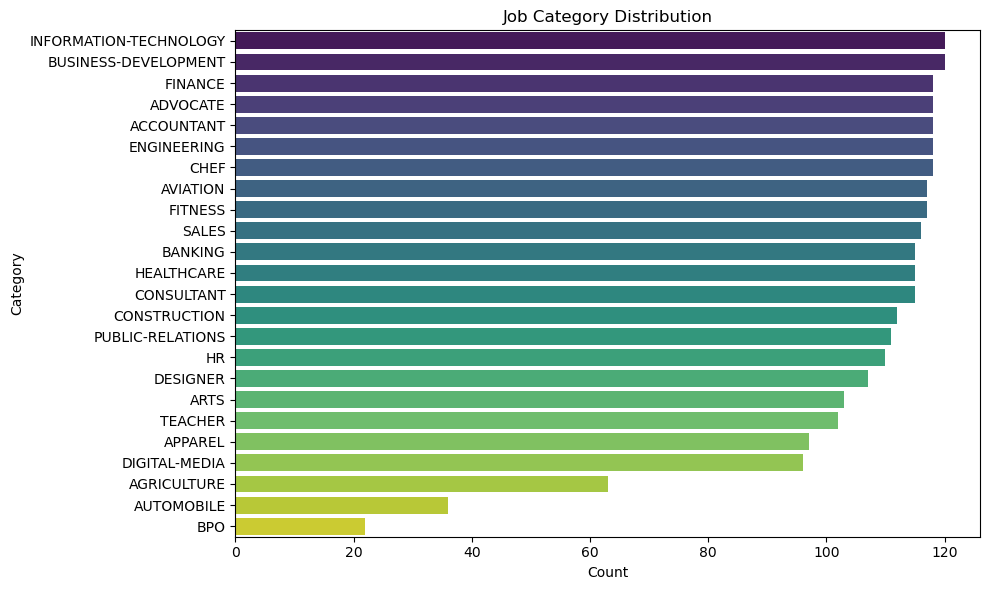

In [5]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title("Job Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [6]:
# WordCloud
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['Resume_str'].apply(clean_text)


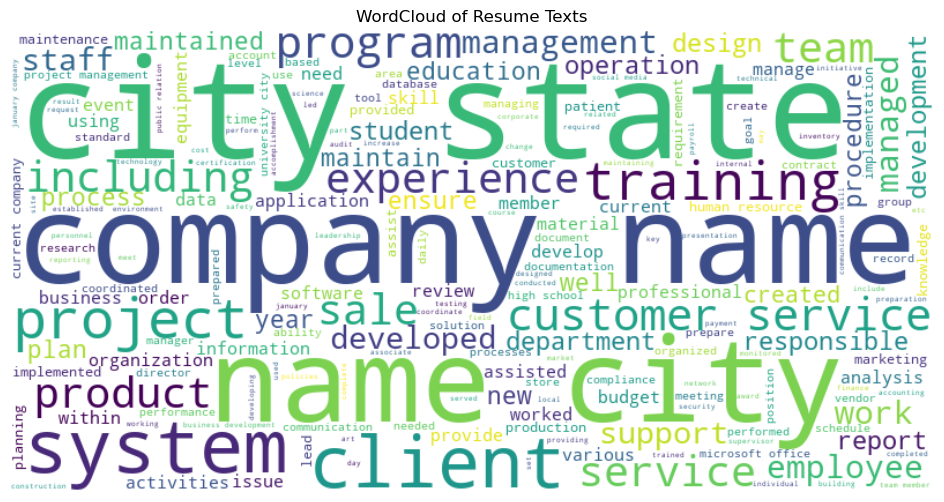

In [7]:
text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Resume Texts")
plt.show()


In [8]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lucy1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucy1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Model Training: Predict Job Category

In [9]:
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['Category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 64.39 %


## Extract Structured Info (Skills, Name, Email, Education, Experience)

In [10]:
def extract_info(text):
    text = clean_text(text)
    info = {}

    skills = ['python', 'sql', 'excel', 'data analysis', 'machine learning', 'statistics', 'kafka']
    info['skills'] = [skill for skill in skills if skill in text]

    info['name'] = re.findall(r'name\s*[:\-]\s*(\w+)', text)
    info['email'] = re.findall(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', text)
    info['education'] = re.findall(r'\b(bachelor|master|bsc|msc|mba|mtech|btech|degree)\b', text)
    info['experience'] = re.findall(r'(\d+\s+years?)', text)

    return info

# Test
sample_text = df['Resume_str'][0]
print("Extracted Info:", extract_info(sample_text))


Extracted Info: {'skills': ['data analysis', 'statistics'], 'name': [], 'email': [], 'education': [], 'experience': []}


#### Generate Personalized Interview Questions

In [11]:
def generate_questions(info):
    questions = []

    for skill in info.get('skills', []):
        questions.append(f"Can you explain your experience with {skill}?")

    if info.get('education'):
        questions.append(f"What was your major focus during your {info['education'][0]}?")
    
    if info.get('experience'):
        questions.append(f"You mentioned having {info['experience'][0]}. Can you describe a challenging project you worked on?")
    
    if not questions:
        questions.append("Tell me about a project you're most proud of.")

    return questions

# Example
info = extract_info(sample_text)
print("Interview Questions:")
for q in generate_questions(info):
    print("-", q)


Interview Questions:
- Can you explain your experience with data analysis?
- Can you explain your experience with statistics?


#### Kafka Integration

In [12]:
# Simulate Kafka producer
def fake_kafka_producer(data):
    print("[Producer] Sending data...")
    message = json.dumps(data)
    return message

# Simulate Kafka consumer
def fake_kafka_consumer(message):
    print("[Consumer] Receiving data...")
    data = json.loads(message)
    print("Received resume info:", data)

    info = extract_info(data['Resume_str'])
    print("\nExtracted Info:", info)
    print("\nSuggested Interview Questions:")
    for question in generate_questions(info):
        print("-", question)

# Simulate full Kafka round-trip
resume_json = df.iloc[0].to_dict()
msg = fake_kafka_producer(resume_json)
fake_kafka_consumer(msg)


[Producer] Sending data...
[Consumer] Receiving data...
Received resume info: {'ID': 16852973, 'Resume_str': "         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) , 

In [13]:
import sqlite3

In [14]:
print("Original Columns:", df.columns)

Original Columns: Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'cleaned_text',
       'Category_encoded'],
      dtype='object')


In [15]:
df.columns = df.columns.str.strip().str.lower()
print("Cleaned Columns:", df.columns)

Cleaned Columns: Index(['id', 'resume_str', 'resume_html', 'category', 'cleaned_text',
       'category_encoded'],
      dtype='object')


In [16]:
df['wordcount'] = df['resume_str'].apply(lambda x: len(str(x).split()))

In [17]:
conn = sqlite3.connect(':memory:')
df.to_sql('resumes', conn, index=False, if_exists='replace')

2484

In [18]:
top_categories = pd.read_sql_query("""
SELECT category, COUNT(*) as count
FROM resumes
GROUP BY category
ORDER BY count DESC
LIMIT 5
""", conn)
print("\nTop 5 Categories:")
print(top_categories)


Top 5 Categories:
                 category  count
0  INFORMATION-TECHNOLOGY    120
1    BUSINESS-DEVELOPMENT    120
2                 FINANCE    118
3             ENGINEERING    118
4                    CHEF    118


In [19]:
python_resumes = pd.read_sql_query("""
SELECT *
FROM resumes
WHERE resume_str LIKE '%python%' COLLATE NOCASE
""", conn)
print(f"\nResumes mentioning 'Python': {len(python_resumes)} found")


Resumes mentioning 'Python': 40 found


In [20]:
combo_keywords = pd.read_sql_query("""
SELECT *
FROM resumes
WHERE resume_str LIKE '%python%' AND resume_str LIKE '%machine learning%'
""", conn)
print(f"\nResumes with 'Python' AND 'Machine Learning': {len(combo_keywords)} found")


Resumes with 'Python' AND 'Machine Learning': 5 found


In [21]:
word_count_by_cat = pd.read_sql_query("""
SELECT category, AVG(wordcount) as avg_words
FROM resumes
GROUP BY category
ORDER BY avg_words DESC
""", conn)
print("\nAverage Word Count by Category:")
print(word_count_by_cat)


Average Word Count by Category:
                  category   avg_words
0                      BPO  974.227273
1   INFORMATION-TECHNOLOGY  926.583333
2         PUBLIC-RELATIONS  889.315315
3               HEALTHCARE  881.773913
4               CONSULTANT  879.704348
5              AGRICULTURE  856.285714
6                       HR  853.727273
7             CONSTRUCTION  852.714286
8                 ADVOCATE  848.500000
9              ENGINEERING  837.550847
10                 FINANCE  811.762712
11              AUTOMOBILE  808.194444
12                 BANKING  803.495652
13              ACCOUNTANT  800.008475
14                    CHEF  797.008475
15           DIGITAL-MEDIA  792.239583
16                AVIATION  791.196581
17                 APPAREL  780.649485
18    BUSINESS-DEVELOPMENT  775.025000
19                    ARTS  774.941748
20                DESIGNER  734.971963
21                 FITNESS  723.034188
22                 TEACHER  715.284314
23                   SALES  689

In [22]:
skills_count = pd.read_sql_query("""
SELECT 
  SUM(CASE WHEN resume_str LIKE '%sql%' THEN 1 ELSE 0 END) AS sql_count,
  SUM(CASE WHEN resume_str LIKE '%excel%' THEN 1 ELSE 0 END) AS excel_count,
  SUM(CASE WHEN resume_str LIKE '%data analysis%' THEN 1 ELSE 0 END) AS dataanalysis_count
FROM resumes
""", conn)
print("\nSkill Mentions Count:")
print(skills_count)


Skill Mentions Count:
   sql_count  excel_count  dataanalysis_count
0        191         1616                 126


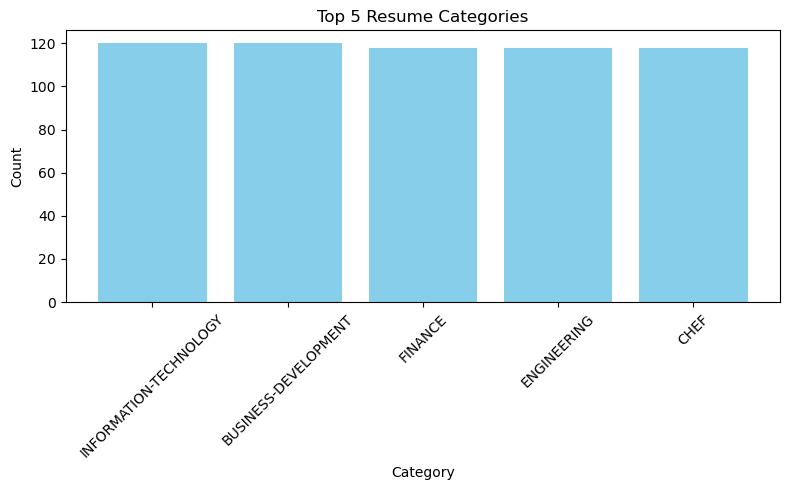

In [23]:
plt.figure(figsize=(8,5))
plt.bar(top_categories['category'], top_categories['count'], color='skyblue')
plt.title("Top 5 Resume Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

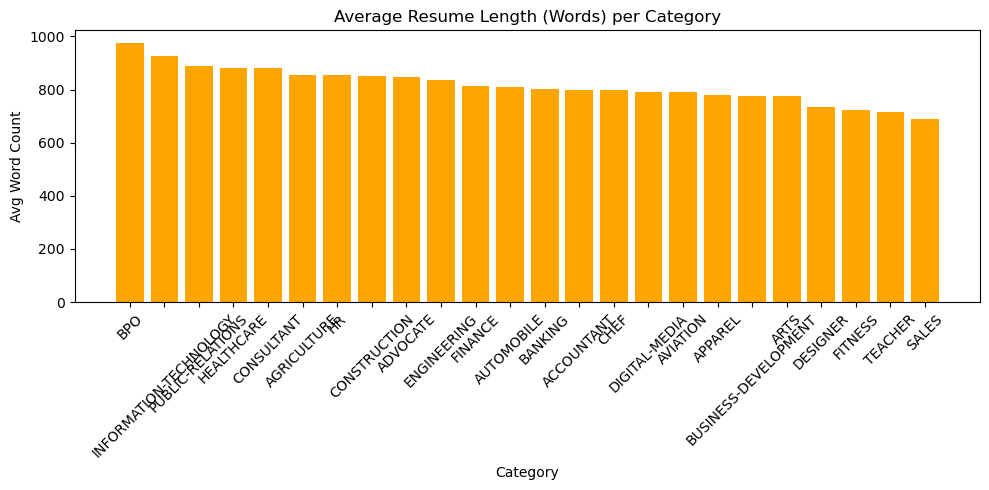

In [24]:
plt.figure(figsize=(10,5))
plt.bar(word_count_by_cat['category'], word_count_by_cat['avg_words'], color='orange')
plt.title("Average Resume Length (Words) per Category")
plt.xlabel("Category")
plt.ylabel("Avg Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Find the Longest Resume per Category

In [25]:
longest_resumes = pd.read_sql_query("""
SELECT *
FROM (
    SELECT *, 
           ROW_NUMBER() OVER (PARTITION BY category ORDER BY wordcount DESC) as rank
    FROM resumes
)
WHERE rank = 1
""", conn)
print("\nLongest Resume per Category:")
print(longest_resumes[['category', 'wordcount']])


Longest Resume per Category:
                  category  wordcount
0               ACCOUNTANT       3459
1                 ADVOCATE       2888
2              AGRICULTURE       1970
3                  APPAREL       1735
4                     ARTS       1507
5               AUTOMOBILE       2889
6                 AVIATION       1829
7                  BANKING       2101
8                      BPO       2310
9     BUSINESS-DEVELOPMENT       1605
10                    CHEF       5080
11            CONSTRUCTION       3994
12              CONSULTANT       2018
13                DESIGNER       2284
14           DIGITAL-MEDIA       3301
15             ENGINEERING       2579
16                 FINANCE       2667
17                 FITNESS       1797
18              HEALTHCARE       2749
19                      HR       3119
20  INFORMATION-TECHNOLOGY       2670
21        PUBLIC-RELATIONS       5190
22                   SALES       2486
23                 TEACHER       2694


In [26]:
query = """
SELECT category, resume_str, wordcount FROM (
    SELECT category, resume_str, wordcount,
           ROW_NUMBER() OVER (PARTITION BY category ORDER BY wordcount DESC) as rank
    FROM resumes
)
WHERE rank = 1
ORDER BY wordcount DESC
"""

In [27]:
longest_resumes = pd.read_sql_query(query, conn)

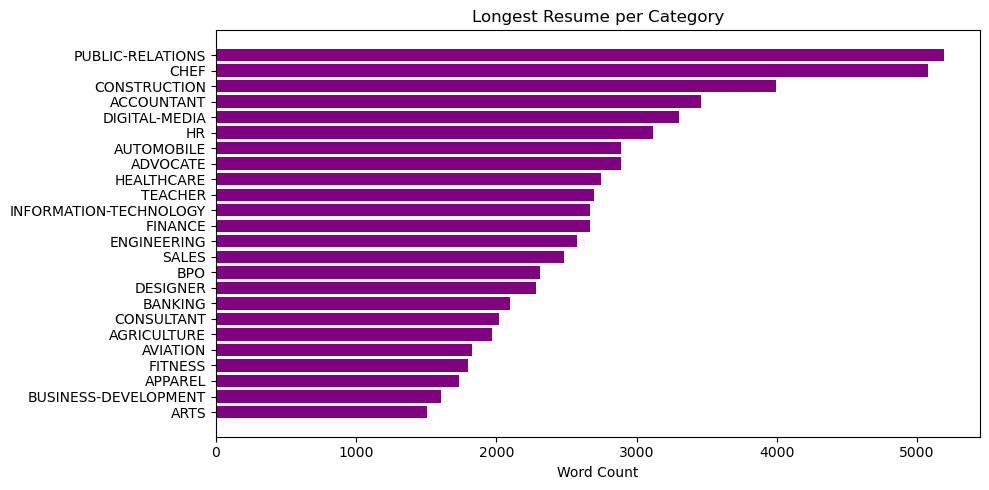

In [28]:
plt.figure(figsize=(10,5))
plt.barh(longest_resumes['category'], longest_resumes['wordcount'], color='purple')
plt.xlabel("Word Count")
plt.title("Longest Resume per Category")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


## Rank Categories by Skill Mentions

In [29]:
# 2. Ranking categories by number of resumes mentioning 'Python' using RANK()
python_count_by_category = pd.read_sql_query("""
SELECT category,
       COUNT(*) AS python_mentions,
       RANK() OVER (ORDER BY COUNT(*) DESC) as rank
FROM resumes
WHERE resume_str LIKE '%python%' COLLATE NOCASE
GROUP BY category
""", conn)
print("\nCategories Ranked by Python Mentions:")
print(python_count_by_category)


Categories Ranked by Python Mentions:
                  category  python_mentions  rank
0              ENGINEERING               11     1
1   INFORMATION-TECHNOLOGY                7     2
2               CONSULTANT                4     3
3     BUSINESS-DEVELOPMENT                3     4
4                 AVIATION                3     4
5                 DESIGNER                2     6
6                  BANKING                2     6
7               AUTOMOBILE                2     6
8              AGRICULTURE                2     6
9         PUBLIC-RELATIONS                1    10
10                 FITNESS                1    10
11           DIGITAL-MEDIA                1    10
12                ADVOCATE                1    10


## Show Word Count Percentile per Resume

In [30]:
# 3. Assign resumes into quartiles based on word count using NTILE()
quartile_wordcounts = pd.read_sql_query("""
SELECT *, 
       NTILE(4) OVER (ORDER BY wordcount DESC) AS quartile
FROM resumes
""", conn)
print("\nResumes Grouped into Quartiles by Word Count:")
print(quartile_wordcounts[['category', 'wordcount', 'quartile']])


Resumes Grouped into Quartiles by Word Count:
                  category  wordcount  quartile
0         PUBLIC-RELATIONS       5190         1
1                     CHEF       5080         1
2             CONSTRUCTION       3994         1
3               ACCOUNTANT       3459         1
4            DIGITAL-MEDIA       3301         1
...                    ...        ...       ...
2479              DESIGNER        131         4
2480                 SALES        128         4
2481                 SALES        122         4
2482          CONSTRUCTION        113         4
2483  BUSINESS-DEVELOPMENT          0         4

[2484 rows x 3 columns]


In [31]:
conn.close()

week 5 : MACHINE LEARNING FOR DATA ANALYSTS

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = resume_df.copy()

df.dropna(inplace=True)

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Hired', axis=1)
y = df_encoded['Hired']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Classification: Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("🔍 Classification Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred))

In [ ]:
# Regression Task (Assuming a continuous column like 'Expected_Salary' to predict)
if 'Expected_Salary' in df.columns:
    Xr = df_encoded.drop('Expected_Salary', axis=1)
    yr = df['Expected_Salary']
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)
    
    reg = LinearRegression()
    reg.fit(Xr_train, yr_train)
    yr_pred = reg.predict(Xr_test)
    print("📊 Regression MSE (Linear Regression):", mean_squared_error(yr_test, yr_pred))

week 6

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

In [ ]:
spark = SparkSession.builder.appName("ResumeBigData").getOrCreate()
spark_df = spark.createDataFrame(df)

In [ ]:
spark_df.show(5)

In [ ]:
spark_df.describe().show()

In [ ]:
if 'Department' in df.columns:
    spark_df.groupBy("Department").agg(avg("Experience")).show()